In [2]:
print("FIRST COME FIRST SERVE SCHEDULLING")
n= int(input("Enter number of processes : "))
d = dict()

for i in range(n):
    key = "P"+str(i+1)
    a = int(input("Enter arrival time of process"+str(i+1)+": "))
    b = int(input("Enter burst time of process"+str(i+1)+": "))
    l = []
    l.append(a)
    l.append(b)
    d[key] = l

d = sorted(d.items(), key=lambda item: item[1][0])

ET = []
for i in range(len(d)):
    # first process
    if(i==0):
        ET.append(d[i][1][1])

    # get prevET + newBT
    else:
        ET.append(ET[i-1] + d[i][1][1])

TAT = []
for i in range(len(d)):
    TAT.append(ET[i] - d[i][1][0])

WT = []
for i in range(len(d)):
    WT.append(TAT[i] - d[i][1][1])

avg_WT = 0
for i in WT:
    avg_WT +=i
avg_WT = (avg_WT/n)

print("Process | Arrival | Burst | Exit | Turn Around | Wait |")
for i in range(n):
      print("   ",d[i][0],"   |   ",d[i][1][0]," |    ",d[i][1][1]," |    ",ET[i],"  |    ",TAT[i],"  |   ",WT[i],"   |  ")
print("Average Waiting Time: ",avg_WT)

FIRST COME FIRST SERVE SCHEDULLING
Enter number of processes : 1
Enter arrival time of process1: 3
Enter burst time of process1: 5
Process | Arrival | Burst | Exit | Turn Around | Wait |
    P1    |    3  |     5  |     5   |     2   |    -3    |  
Average Waiting Time:  -3.0


In [8]:
## EDA for Marketing Campaign and Hyperparameter tuning.
import pandas as pd
campaigns = pd.read_csv("mktcmpg.csv")
campaigns
## READ A FILE. THIS DATA CONTAINS WEEKLY DATA ON ONLINE MARKET.
## OVERVIEW OF ENTIRE  MARKET AND SUMMERIZE THE FINDINGS 

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


In [9]:
campaigns.info() ## NO Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [10]:
campaigns.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [12]:
campaigns['revenue per visitor'] = campaigns['SalesInThousands']/7  ## per day revenue of each store
campaigns.head(20)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands,revenue per visitor
0,1,Medium,1,4,3,1,33.73,4.818571
1,1,Medium,1,4,3,2,35.67,5.095714
2,1,Medium,1,4,3,3,29.03,4.147143
3,1,Medium,1,4,3,4,39.25,5.607143
4,1,Medium,2,5,2,1,27.81,3.972857
5,1,Medium,2,5,2,2,34.67,4.952857
6,1,Medium,2,5,2,3,27.98,3.997143
7,1,Medium,2,5,2,4,27.72,3.960000
8,1,Medium,3,12,1,1,44.54,6.362857
9,1,Medium,3,12,1,2,37.94,5.420000


In [13]:
campaigns['revenue per day'] = campaigns['SalesInThousands']/7  ## per day revenue of each store
campaigns.head(20)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands,revenue per visitor,revenue per day
0,1,Medium,1,4,3,1,33.73,4.818571,4.818571
1,1,Medium,1,4,3,2,35.67,5.095714,5.095714
2,1,Medium,1,4,3,3,29.03,4.147143,4.147143
3,1,Medium,1,4,3,4,39.25,5.607143,5.607143
4,1,Medium,2,5,2,1,27.81,3.972857,3.972857
5,1,Medium,2,5,2,2,34.67,4.952857,4.952857
6,1,Medium,2,5,2,3,27.98,3.997143,3.997143
7,1,Medium,2,5,2,4,27.72,3.960000,3.960000
8,1,Medium,3,12,1,1,44.54,6.362857,6.362857
9,1,Medium,3,12,1,2,37.94,5.420000,5.420000


C:\Users\Dell\AppData\Local\Temp\ipykernel_22348\3178096372.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  campaigns.groupby(['revenue per day'])['revenue per day', 'week'].sum().plot(kind='bar', label='Revenue per day')


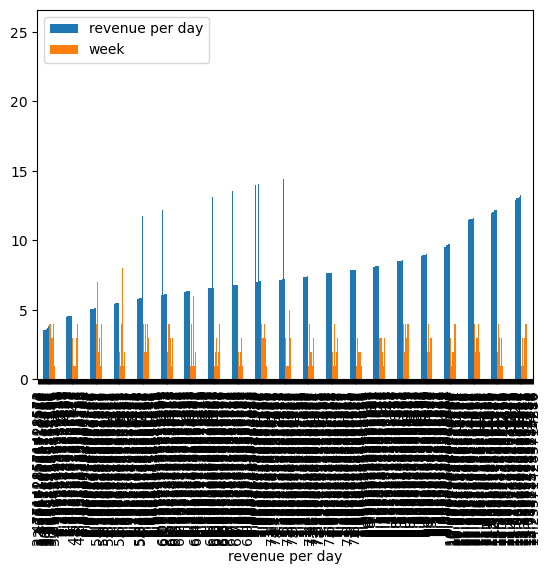

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

campaigns.groupby(['revenue per day'])['revenue per day', 'week'].sum().plot(kind='bar', label='Revenue per day')
plt.legend()

<Axes: xlabel='week', ylabel='AgeOfStore'>

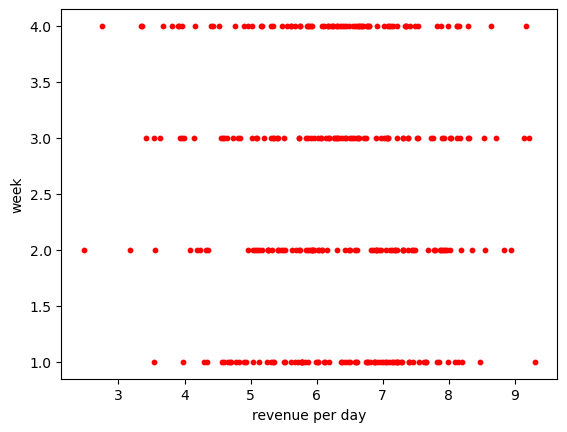

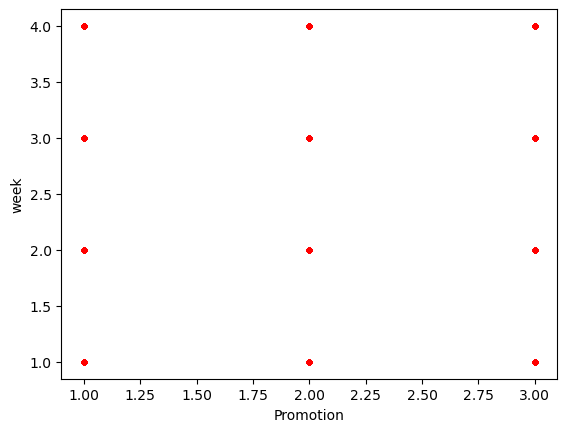

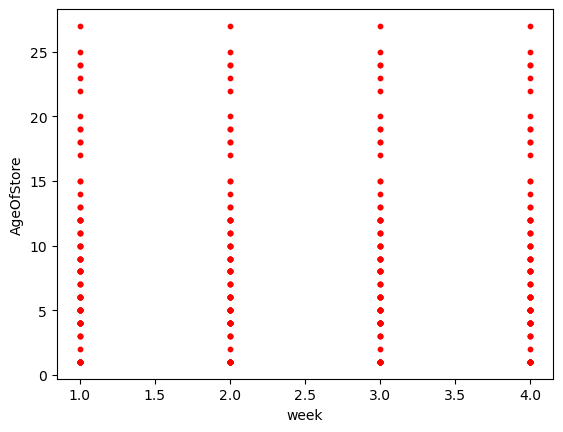

In [17]:
a = campaigns[campaigns.MarketSize == 'Medium']
a.plot.scatter('revenue per day', 'week', s=10, c='red')
a.plot.scatter('Promotion', 'week', s=10, c='red')
a.plot.scatter('week', 'AgeOfStore', s=10, c='red')

<Axes: xlabel='week', ylabel='AgeOfStore'>

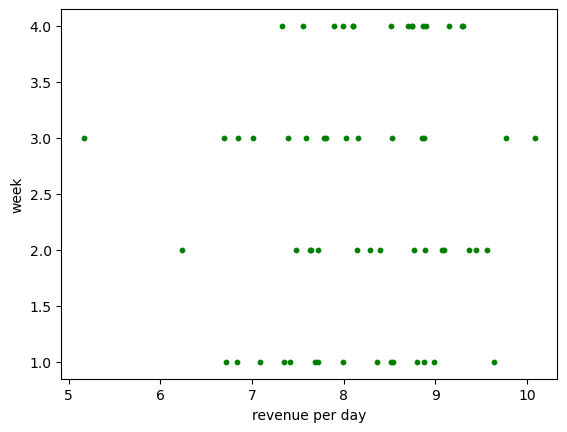

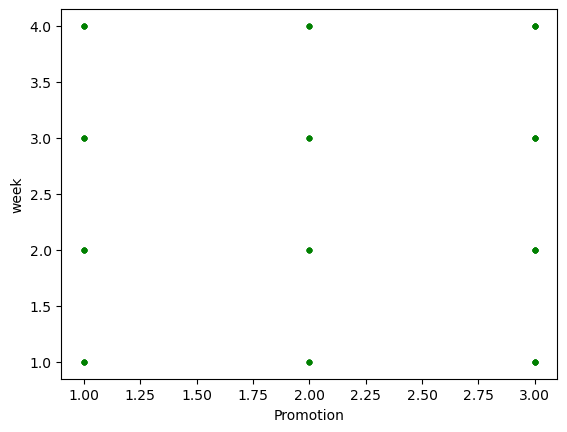

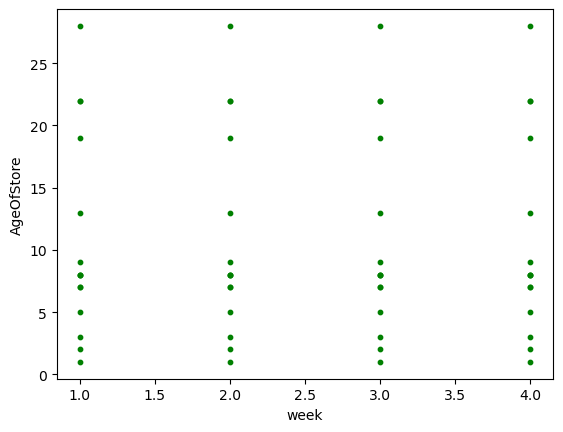

In [23]:
a = campaigns[campaigns.MarketSize == 'Small']
a.plot.scatter('revenue per day', 'week', s=10, c='green')
a.plot.scatter('Promotion', 'week', s=10, c='green')
a.plot.scatter('week', 'AgeOfStore', s=10, c='green')

<Axes: xlabel='week', ylabel='AgeOfStore'>

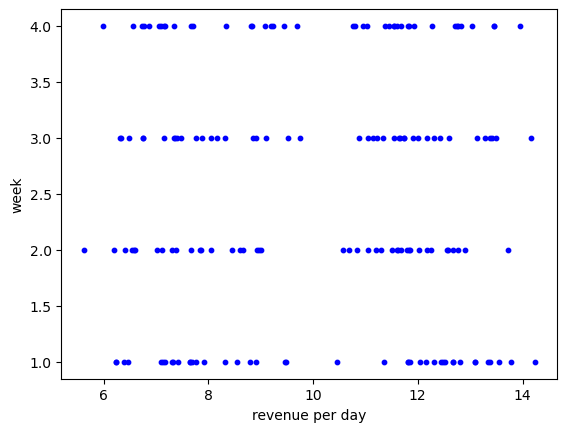

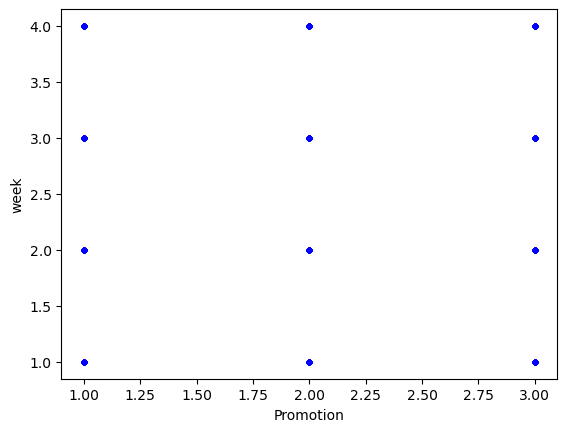

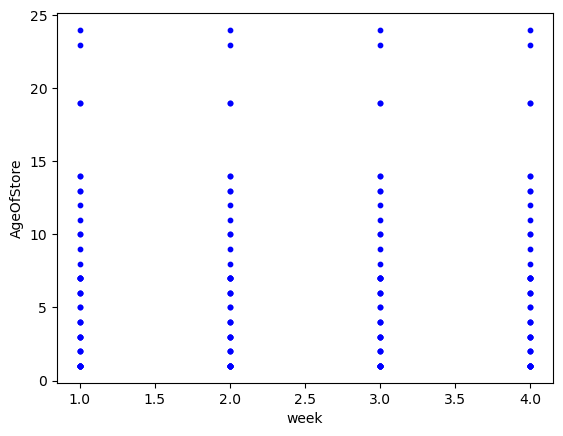

In [22]:
a = campaigns[campaigns.MarketSize == 'Large']
a.plot.scatter('revenue per day', 'week', s=10, c='blue')
a.plot.scatter('Promotion', 'week', s=10, c='blue')
a.plot.scatter('week', 'AgeOfStore', s=10, c='blue')

In [ ]:
## when ur data is stable, then we have to use hyperparameter tuning